In [122]:
import numpy as np
from matplotlib import pyplot as plt

In [123]:
A1 = np.load('mnist_uint8/sequential_1_dense_1_MatMul.npy')
B1 = np.load('mnist_uint8/dense_1_bias.npy')
A2 = np.load('mnist_uint8/sequential_1_dense_2_MatMul.npy')
B2 = np.load('mnist_uint8/dense_2_bias.npy')
test_image = np.load('test_image_label_27.npy')
print(A1.shape, B1.shape)
print(A2.shape, B2.shape)
print(test_image.shape, test_image.dtype)

(128, 784) (128,)
(10, 128) (10,)
(28, 28) float32


In [124]:
print(0.007086 * A1.flatten()[0:5])
print(0.000028 *B1[0:5])

[ 0.049602 -0.03543  -0.028344 -0.056688  0.056688]
[-0.066192  0.139524 -0.064176  0.011732  0.10094 ]


For index 27, the expected label is 4. Here's the expected tensor output, obtained by running the TFLite Interpretor on the same test image:

**[ 75  97 100 108 217 110  85 128  97 159]**

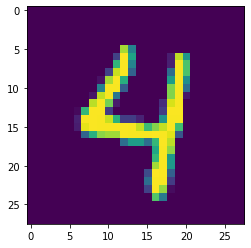

In [125]:
plt.imshow(tmp)
plt.show()

In [126]:
#print(test_image)
#print(test_image_uint8)

In [127]:
def ReLU(x):
    return x * (x > 0)

In [130]:
X = test_image.flatten()
#X = 0.003921568859368563 * X
#X = 0.003921568859368563 * (X + 128)

qa1 = 0.007085771299898624
qb1 = 0.000027787340513896197 
X1 = np.matmul(A1*qa1, X) + B1*qb1
X1 = ReLU(X1)
X1 = 0.04413054510951042 * (X1 + 128)

qa2 = 0.007275809068232775
qb2 = 0.00032108541927300394 
X2 = np.matmul(A2*qa2, X1) + B2*qb2
X2 = 0.1862911880016327 * (X2 - 17)
X2 =  0.1862911880016327 * (X2 - 145)

print(X2, X2.shape)
print(np.argmax(X2))

[-29.33426057 -28.85156182 -28.25955224 -28.16763484 -29.18841013
 -28.26057322 -29.28854238 -28.14261387 -28.96296627 -28.84980936] (10,)
7
